# Design of Experiments (DoE) generation

The **OpenTurns** library offers a section devoted to the development of experimental plans, alias "Designs of Experiments". All of the functions offered and the associated documentation are available at:
https://openturns.github.io/openturns/latest/user_manual/designs_of_experiments.html

This notebook illustrates some DOEs available in OpenTURNS:

   - **Stratified** plans (axial, factorial, composite and box).

   - Sequences with **low discrepancy** (Sobol', Halton, Haselgrove ...).

   - **Quasi-random** plans (Latin hypercube).

#### Modules import

In [1]:
import numpy as np
import openturns as ot
from openturns.viewer import View
import pylab as pl
#%pylab --no-import-all inline
%matplotlib inline

# 1. Stratified design of experiments

Experimental plans are defined from their center and a number of discretization levels. The number of levels is identical for each dimension. Let $d$ be the number of dimensions and $n_{levels}$ the number of levels.

#### 1.1. Axial plane
The axial stratified plane contains only points along the axes. It is not appropriate when there are interactions between variables. The layout of the points is obtained by discretizing each direction according to the specified levels and symmetrically with respect to the center of the experimental plan. The number of points generated is $N_{axial} = 1 + 2 d \times n_{levels}$.

Documentation : https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.Axial.html#openturns.Axial

#### 1.2. Factorial plane
The factorial plane contains points only on the diagonals. It is not suitable for modeling the influences of a single input variable. The layout of the points is obtained by discretizing each main diagonal according to the specified levels and symmetrically with respect to the center of the experimental design. The number of points generated is $N_{axial} = 1 + 2^d \times n_{levels}$.

Documentation: https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.Factorial.html#openturns.Factorial

#### 1.3. Composite plan
The composite plane is the union of the axial and factorial planes. The number of points generated is $N_{axial} = 1 + 2 d \times n_{levels} + 2^d \times n_{levels}$.

Documentation: https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.Composite.html#openturns.Composite

#### 1.4. box map
This plan is a simple regular discretization of a box where the number of intermediate points is given for each dimension $d_i$, noted $n_{inter}(d_i)$. The number of points generated is $\prod_{i=1}^d 2+n_{inter} (d_i)$.

Documentation: https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.Box.html#openturns.Box

In [2]:
# Coordinates of centers and number of levels per dimension
center = ot.Point([0., 0.])
levels = ot.Point([2, 4])

#  axial Doe
axial_design = ot.Axial(center, levels).generate()
axial_design *= 1/(max(levels) * 2)
axial_design += 0.5

#  factorial Doe
factorial_design = ot.Factorial(center, levels).generate()
factorial_design *= 1/(max(levels) * 2)
factorial_design += 0.5

# composite Doe
composite_design = ot.Composite(center, levels).generate()
composite_design *= 1/(max(levels) * 2)
composite_design += 0.5

# box Doe
level_box = [3, 3]
box_design = ot.Box(level_box).generate()

C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\envs\Formation6\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


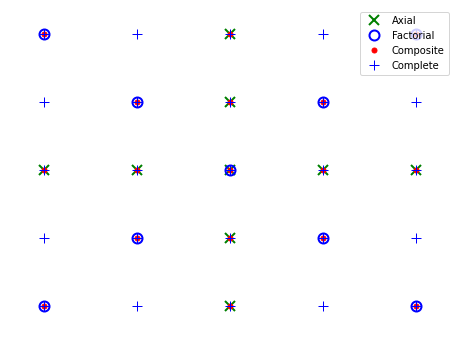

In [4]:
fig, ax = pl.subplots(figsize=(8, 6))
View(ot.Cloud(axial_design), axes=[ax],
     plot_kwargs={'marker':'x', 'ms':10, 'color':'g', 'markeredgewidth':2, 'label':'Axial'})
View(ot.Cloud(factorial_design), axes=[ax],
     plot_kwargs={'marker':'o', 'markerfacecolor':'none', 'ms':10, 'markeredgewidth':2, 'label':'Factorial'})
View(ot.Cloud(composite_design), axes=[ax],
     plot_kwargs={'marker':'.', 'ms':10, 'color':'r', 'label':'Composite'})
View(ot.Cloud(box_design), axes=[ax], plot_kwargs={'ms':10, 'label':'Complete'})
ax.set_xlim(xmin=-0.1, xmax=1.1)
ax.set_ylim(ymin=-0.1, ymax=1.1)
ax.legend()
ax.grid()
fig.show()

#2. Low Discrepancy Plans

It is a deterministic sequence of points in the parameter space, which “uniformly” fills this space. For all values ​​of $N$, a subsequence $(x_1, \ldots, x_N)$ has a low discrepancy.

OpenTURNS offers several low discrepancy designs: Sobol', Faure, Halton, Haselgrove and Reverse Halton. These sequences have their performances which degrade rapidly with the increase in dimension. Several recommendations can be made:

- use the Halton or Reverse Halton sequence for dimensions less than 8,
- use the Faure sequence for dimensions less than 25,
- use the Haselgrove sequence for dimensions less than 50,
- use the Sobol' sequence for dimensions up to several hundred (limited to 40 in OpenTURNS).

#### Visual comparison of suites

C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\envs\Formation6\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


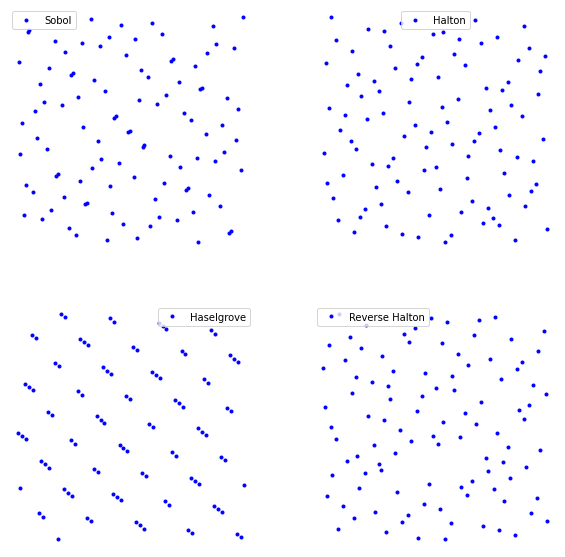

In [5]:
size = 100

sequences = list()
sequences.append(ot.SobolSequence(2).generate(size))
sequences.append(ot.HaltonSequence(2).generate(size))
sequences.append(ot.HaselgroveSequence(2).generate(size))
sequences.append(ot.ReverseHaltonSequence(2).generate(size))

labels = ['Sobol', 'Halton', 'Haselgrove', 'Reverse Halton']

fig = pl.figure(figsize = (10, 10))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_aspect('equal')
    View(ot.Cloud(sequences[i]), plot_kwargs={'marker':'.'}, axes=[ax])
    ax.legend([labels[i]])
    ax.grid()
fig.show()

#### Sobol sequences of different sizes

C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\envs\Formation6\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


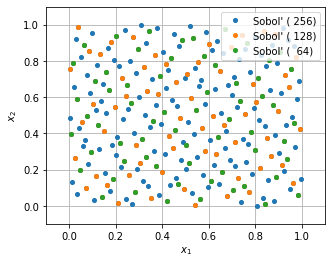

In [6]:
fig, ax = pl.subplots(figsize=(5, 4))
for size in [256, 128, 64]:
    X = np.array(ot.HaltonSequence(2).generate(size))
    ax.plot(X[:, 0], X[:, 1], '.', label="Sobol' (%4d)" % size, markersize=8)
ax.legend()
ax.set_xlim(-.1, 1.1)
ax.set_ylim(-.1, 1.1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid()
fig.show()

#### Sobol' sequence with double initialization

This can be useful when you have a parameter that only takes 2 values. In this case, it is possible to generate 2 experimental plans then to concatenate them. The idea of ​​initializing the Sobol sequence (or the LHS, or other low discrepancy plane) differently is to "throw" the points differently in the 2 planes with respect to the other parameters. Thus, we avoid possible duplicates and we provide more information during the construction of an associated metamodel.

C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\envs\Formation6\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


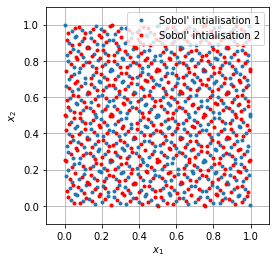

In [7]:
fig, ax = pl.subplots(figsize=(4, 4))
size  = 500
sequence = ot.LowDiscrepancySequence(ot.SobolSequence(2))
X = sequence.generate(size)
ax.plot(X[:, 0], X[:, 1], '.', label="Sobol' intialisation 1", markersize=6)
ax.legend()
#On réinitialise en appliquant la méthode '.generate' (autant de fois que nécessaire)
X = sequence.generate(size)
ax.plot(X[:, 0], X[:, 1], '.', label="Sobol' intialisation 2", markersize=6, color = 'red')

ax.legend()
ax.set_xlim(-.1, 1.1)
ax.set_ylim(-.1, 1.1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid()
fig.show()

## Quasi-random shots

### Latin Hypercube Plane (LHS)

The interval $[0,1]$ is divided into $N$ intervals. We randomly sample a point in each interval:
$\left] \frac{i}{N}; \frac{i+1}{N} \right]$.

The components of the vectors thus generated are randomly paired, so as to have in the “hypercube” a single point per dimension. The projections along each dimension correspond to a uniform sampling.

The drawn points are transformed according to the marginals of the distribution which must be uncorrelated.

C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\envs\Formation6\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


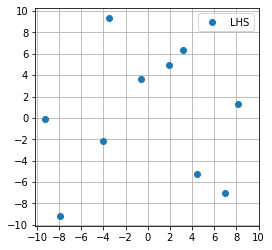

In [8]:
xmin = -10
xmax = 10
distribution = ot.ComposedDistribution([ot.Uniform(xmin, xmax)]*2)
size = 10
X = ot.LHSExperiment(distribution, size).generate()
fig, ax = pl.subplots(figsize=(4, 4))
ax.plot(X[:, 0], X[:, 1], 'o', markersize = 6)
ax.set_yticks(np.linspace(xmin, xmax, size+1))
ax.set_xticks(np.linspace(xmin, xmax, size+1))
ax.legend(['LHS'])
ax.grid()
fig.show()

#### It is possible to use other distributions. The transformation along the marginals can also be performed from a sequence with low discrepancy.

In [9]:
distributions = [ot.ComposedDistribution([ot.Uniform(0., 1.)] * 2),
                ot.ComposedDistribution([ot.Normal(0., 1.)] * 2)]
size = 1000

#### LHS

C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\envs\Formation6\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


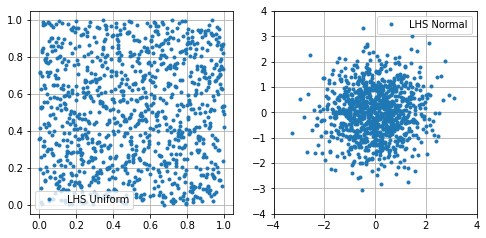

In [10]:
fig = pl.figure(figsize=(8, 4))
for i, distri in enumerate(distributions):
    X = ot.LHSExperiment(distri, size).generate()
    ax = fig.add_subplot(1, 2, i+1)
    ax.plot(X[:, 0], X[:, 1], '.')
    ax.legend(['LHS ' + distri.getMarginal(0).getName()])
    if i==1:
        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.grid()
fig.show()

#### Low discrepancy sequences

C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\envs\Formation6\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


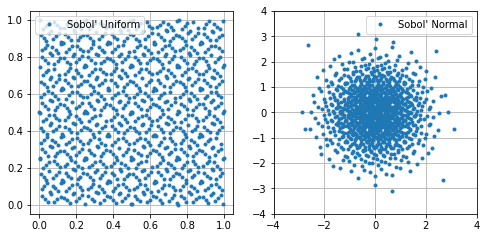

In [11]:
fig = pl.figure(figsize=(8, 4))
for i, distri in enumerate(distributions):
    X = ot.LowDiscrepancyExperiment(ot.SobolSequence(), distri, size).generate()
    ax = fig.add_subplot(1, 2, i+1)
    ax.plot(X[:, 0], X[:, 1], '.')
    ax.legend(["Sobol' " + distri.getMarginal(0).getName()])
    if i==1:
        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.grid()
fig.show()

#### Monte Carlo

C:\Users\benjamin.martin\AppData\Local\Continuum\anaconda3\envs\Formation6\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


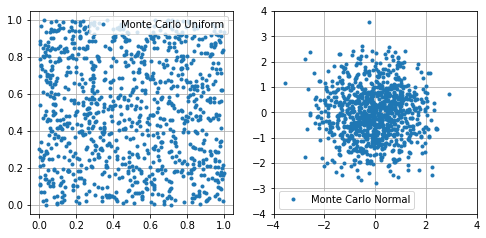

In [12]:
fig = pl.figure(figsize=(8, 4))
for i, distri in enumerate(distributions):
    X = ot.MonteCarloExperiment(distri, size).generate()
    ax = fig.add_subplot(1, 2, i+1)
    ax.plot(X[:, 0], X[:, 1], '.')
    ax.legend(["Monte Carlo " + distri.getMarginal(0).getName()])
    if i==1:
        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.grid()
fig.show()